<a href="https://colab.research.google.com/github/DivyalakhsmiSwamiraj/Airbnb-Analysis/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
#load dataset
df=pd.read_csv("/content/Airbnb NYC 2019 (1).csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [45]:
df.shape

(48895, 16)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [47]:
#duplicate values
df.duplicated().sum()

0

In [48]:
#null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [49]:
# now we will fill the Nan values in remaining missing value column
df = df.fillna('Not Available')

In [50]:
df.loc[df['name'] == 'Not Available']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,Not Available,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,Not Available,Not Available,1,362
3703,2232600,Not Available,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,Not Available,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,Not Available,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,Not Available,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,Not Available,Not Available,1,0
6567,4756856,Not Available,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,Not Available,Not Available,1,0
6605,4774658,Not Available,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,Not Available,Not Available,1,0
8841,6782407,Not Available,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,Not Available,Not Available,1,0
11963,9325951,Not Available,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,Not Available,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,Not Available,Not Available,5,0


In [51]:
df.loc[df['price'] == 0]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,Not Available,Not Available,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [52]:
# As price can't be zero, we are going to exclude the data with zero cost value
df.drop(df[df['price']== 0].index,inplace = True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Not Available,Not Available,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Not Available,Not Available,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Not Available,Not Available,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Not Available,Not Available,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Not Available,Not Available,6,2


In [53]:
df.shape

(48884, 16)

In [54]:
df['price'].min()

10

In [55]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [56]:
df.to_csv("cleanAirbnb NYC 2019.csv")

## DATA VIZUALIZATION


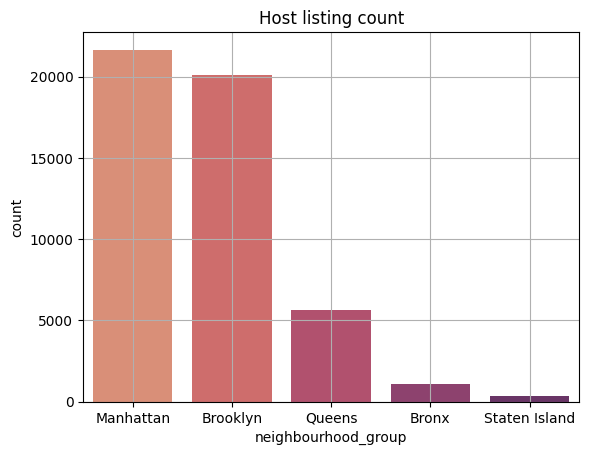

In [57]:
# Chart - 1 Visualization code
sns.countplot(data= df, x= 'neighbourhood_group', palette= "flare", order= df['neighbourhood_group'].value_counts(ascending= False).index).set_title('Host listing count')
plt.grid()
plt.show()

* This chart tells us about number of host listings count in various neighbourhood groups, with Manhattan being largest and Staten Island being smallest in value count.

* It will be easier to know in which neighbourhood groups there is an abundance of hosts ready to take in customers and which areas have scarcity of the same.

In [58]:
#chart 2
# Top 10 neighbourhoods with highest count of listings
top_n_df = df['neighbourhood'].value_counts().reset_index()[0:11]
top_n_df.columns=['Neighbourhood','Count']
top_n_df


,Neighbourhood,Count
0,Williamsburg,3919
1,Bedford-Stuyvesant,3710
2,Harlem,2658
3,Bushwick,2462
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


Text(0.5, 1.0, 'Top 10 Neighbourhood host count')

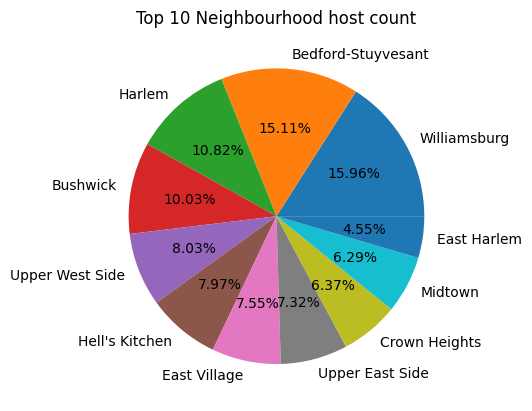

In [59]:
# Chart - 2 Visualization code
plt.pie(x='Count', labels='Neighbourhood', data=top_n_df, autopct='%0.2f%%',startangle=0)
plt.title('Top 10 Neighbourhood host count')

* We found out top 10 neighbourhoods with highest number of host listings count.

* We can visualize the percentage share division of various host counts among these neighbourhoods.

* Williamsburg being the neighbourhood with highest percentage of host listings count of 15.96% and East-Harlem at 10th position with 4.55% count share.

Text(0.5, 1.0, 'Pricing in different Neighbourhood groups')

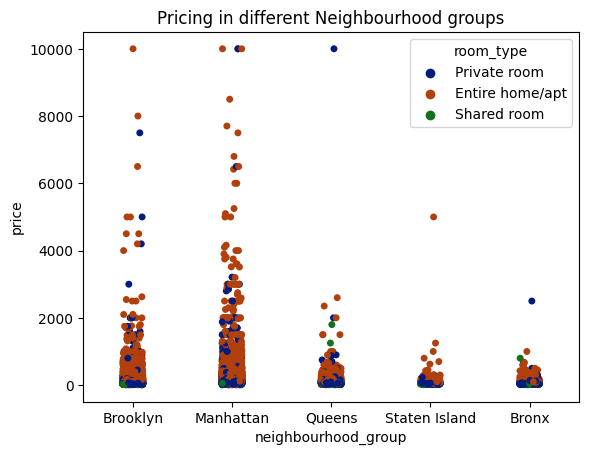

In [60]:
# Chart - 3 visualization code
sns.stripplot(x='neighbourhood_group', y='price', hue='room_type', data=df, palette='dark').set_title('Pricing in different Neighbourhood groups')

* We can see the price distribution of listings in various neighbourhood groups. We can even differentiate price of a particular room type in a particular neighbourhood group by color.

* Staten Island and Bronx have listings mostly priced on lesser side, same can be said about Queens but with one outlier, whereas price distribution for Manhatten and Brooklyn is varried and we can see many high priced listings too.

Text(0.5, 1.0, 'Room types and their Availability year round')

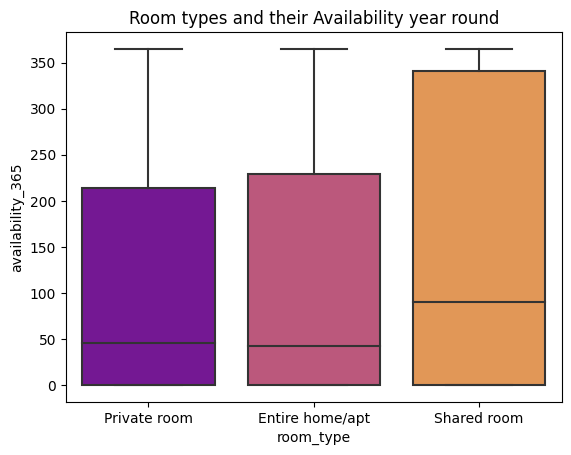

In [61]:
# Chart - 4 visualization code
sns.boxplot(data=df, x='room_type',y='availability_365',palette='plasma').set_title('Room types and their Availability year round')

* Given chart plots the relation between a listing's room type and it's availability round the year.

* With around 50 days being the average availability time for room types "Private" and "Entire Home/Apartment" round the year while around 100 days for "Shared room" room type.

* Highest time of availability for room types "Private" and "Entire Home/Apartment" is between 200 to 250 days, while for "Shared room" it's between 300 to 350 days.

* Availability of a "Shared room" type is more abundant than other two types.

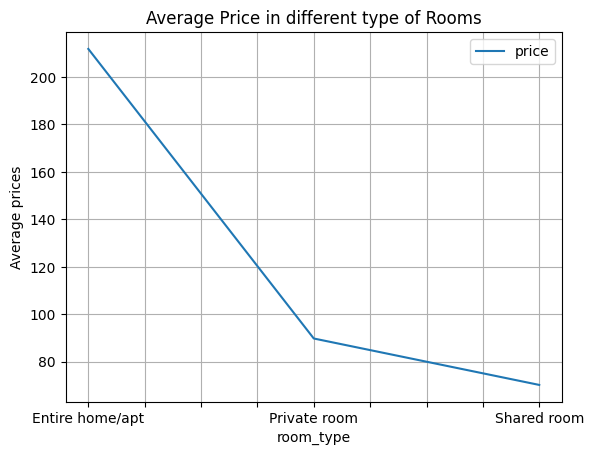

In [62]:
# Chart - 5 visualization code
mean_price_df = df.groupby(['room_type'])['price'].mean().reset_index()
mean_price_df.plot(x='room_type',y='price', title='Average Price in different type of Rooms')
plt.ylabel('Average prices')
plt.grid()

* The above graph a linear representation between different type of rooms and average price of listings.

* Clearly "Entire home/Apartment" are the most expensive and "Shared room" are the cheapest types of room.

* Where a "Shared room" can cost an average below 80 dollars and a "Private room" between 80-100 dollars, an "Entire room/Apartment" can cost above 200 dolaars.

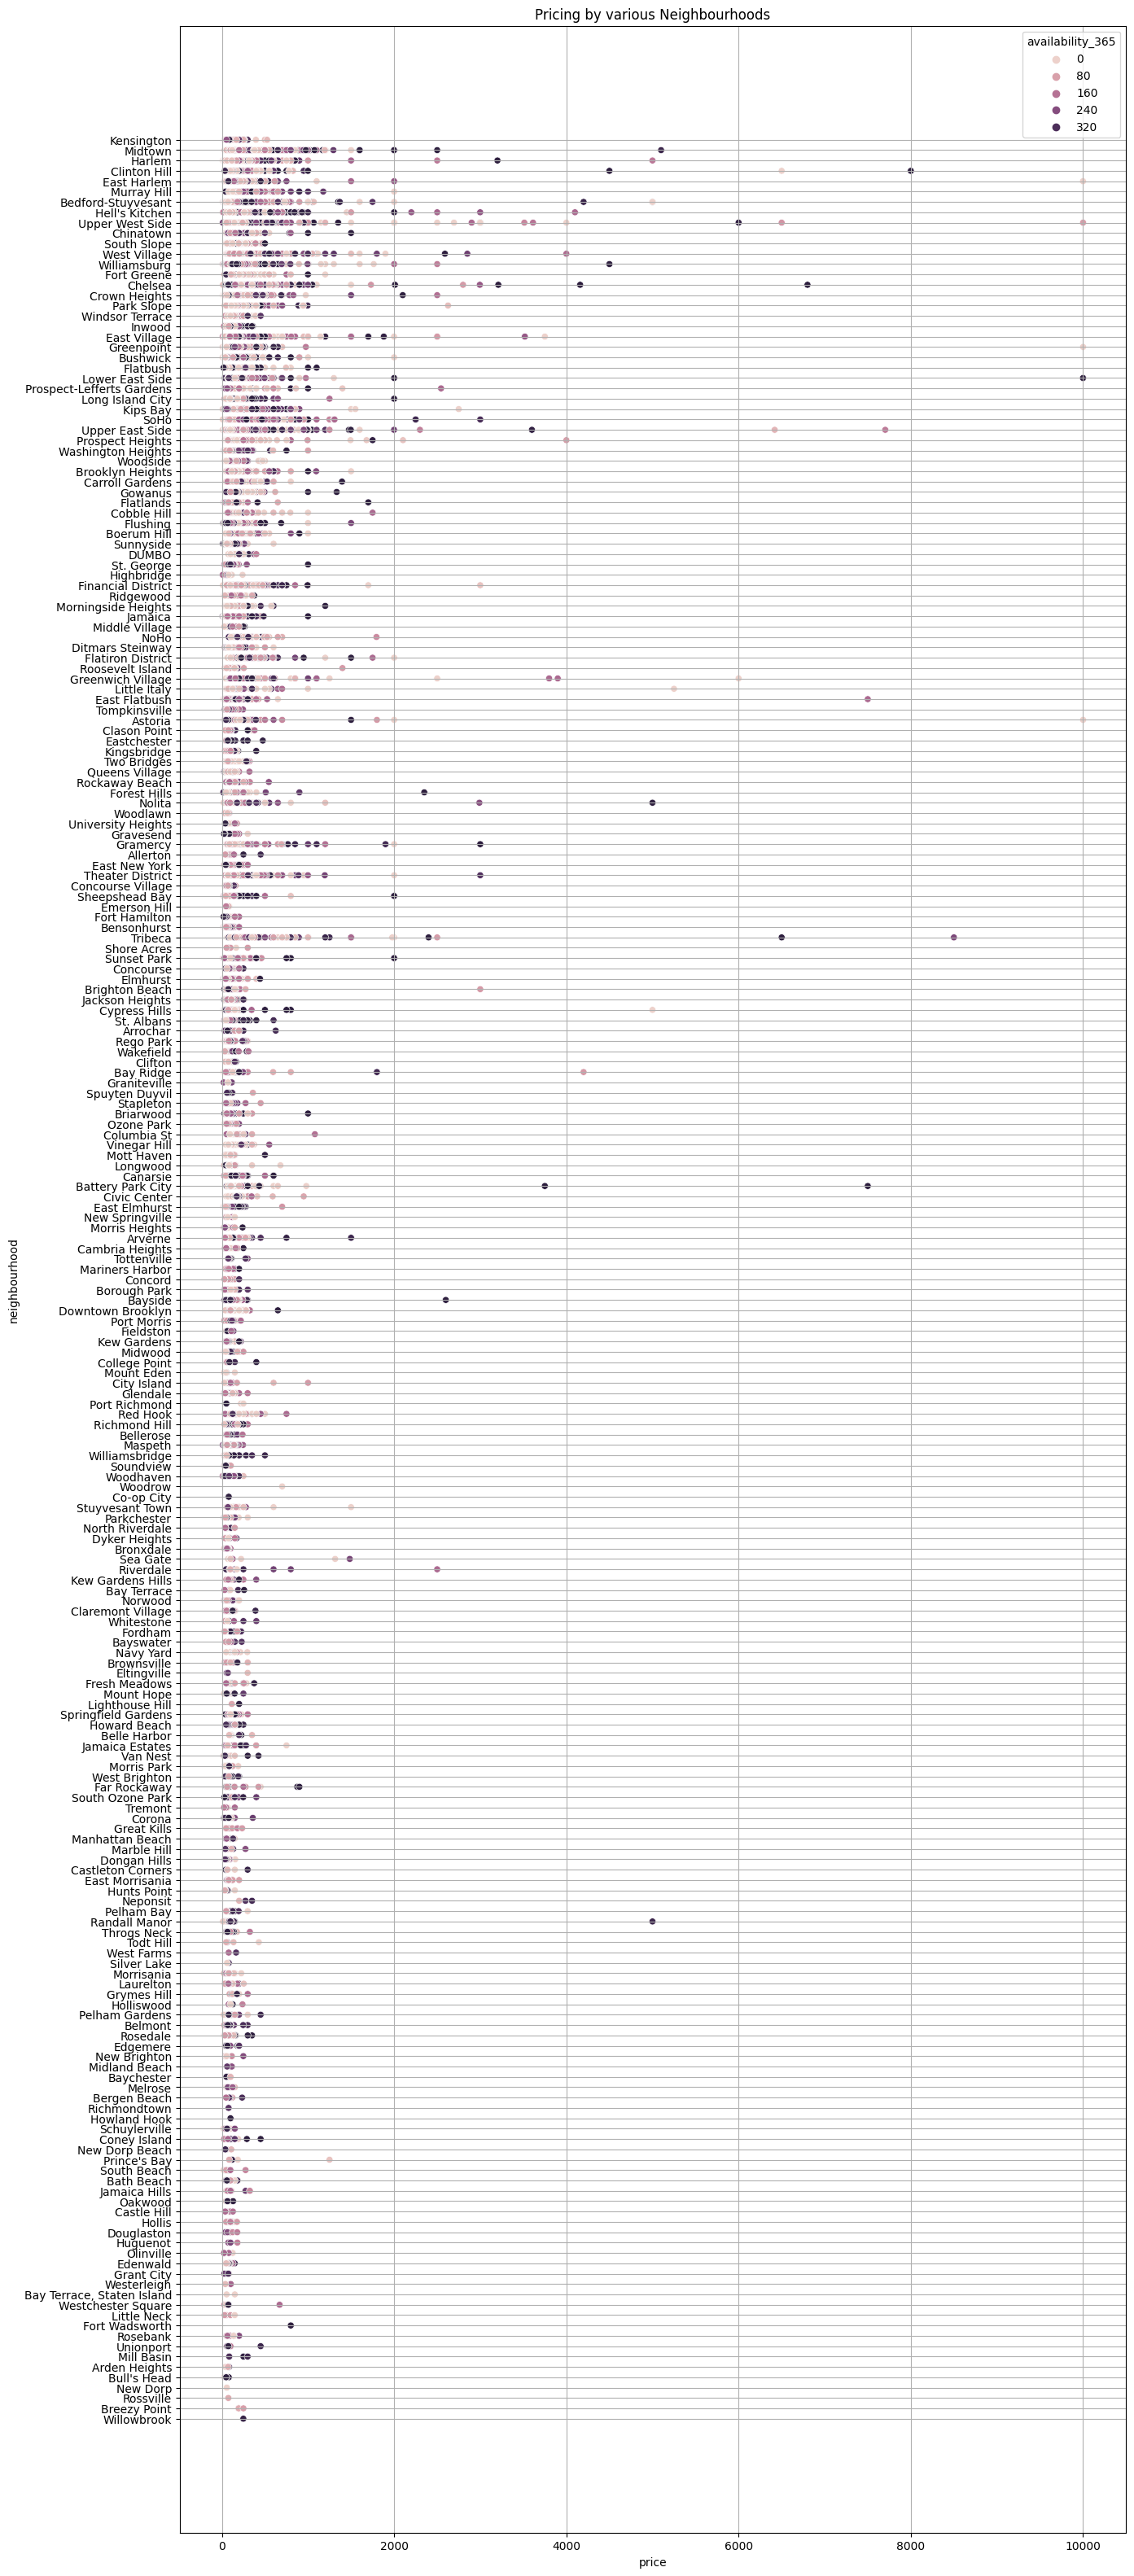

In [63]:
# Chart - 6 visualization code
sns.scatterplot(y='neighbourhood', x='price', data= df, hue='availability_365').set_title('Pricing by various Neighbourhoods')
fig = plt.gcf()
fig.set_size_inches(15,40)
plt.grid()

* Top 5 neighbourhood with highest priced listing are "East Harlem", "Upper West side", "Lower West side", "Greenpoint" and "Astoria" almost around 10000.

* Neighbourhoods with a single listing are "Willowbrook", "Rossville", "New Dorp", "Co-op city", "fort Wadsworth", "Richmondtown", "Howlandhook" and "Woodrow".

* Most of the neighbourhoods have priced their listings under 2000, while there are quite a few between 2000-4000 but even fewer above 4000.

In [64]:
#chart 7
# Finding top 10 most expensive listings
top_hp = df.groupby(['host_id', 'host_name', 'room_type', 'neighbourhood'])['price'].max().reset_index()
top_hp = top_hp.sort_values(by='price', ascending=False).head(10)
top_hp

,host_id,host_name,room_type,neighbourhood,price
28350,72390391,Jelena,Entire home/apt,Upper West Side,10000
17317,20582832,Kathrine,Private room,Astoria,10000
8197,5143901,Erin,Entire home/apt,Greenpoint,10000
7455,4382127,Matt,Entire home/apt,Lower East Side,9999
6753,3906464,Amy,Private room,Lower East Side,9999
2699,1235070,Olson,Entire home/apt,East Harlem,9999
16340,18128455,Rum,Entire home/apt,Tribeca,8500
2600,1177497,Jessica,Entire home/apt,Clinton Hill,8000
33973,156158778,Sally,Entire home/apt,Upper East Side,7703
38896,262534951,Sandra,Private room,East Flatbush,7500


In [65]:
name_of_host = top_hp['host_name']
charge = top_hp['price']

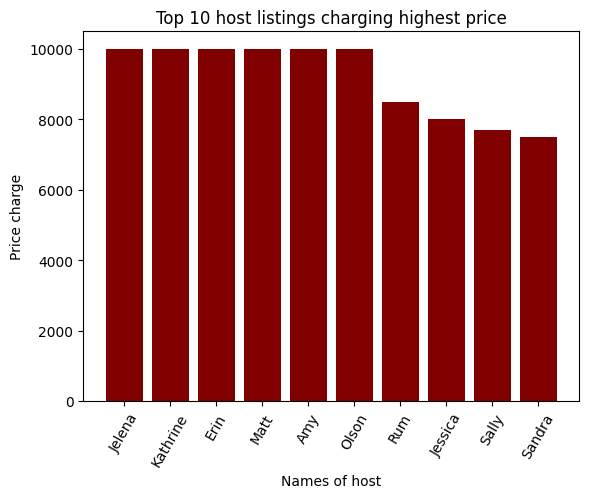

In [66]:
# Chart - 7 Visualization code
plt.bar(name_of_host, charge, color='maroon')
plt.title('Top 10 host listings charging highest price')
plt.xlabel('Names of host')
plt.xticks(rotation=60)
plt.ylabel('Price charge')
plt.show()

* "Jelena", "Katherine", "Erin", "Matt", "Amy" and "Olsen" are the top 6 hosts charging the highest amount of whopping 10000 for a listing.

In [67]:
df_temp = df[df['price'] <= 500]  # Setting price range upto 500 to get better visualization of distribution


Text(0.5, 1.0, 'Pricing range by Neighbourhood groups')

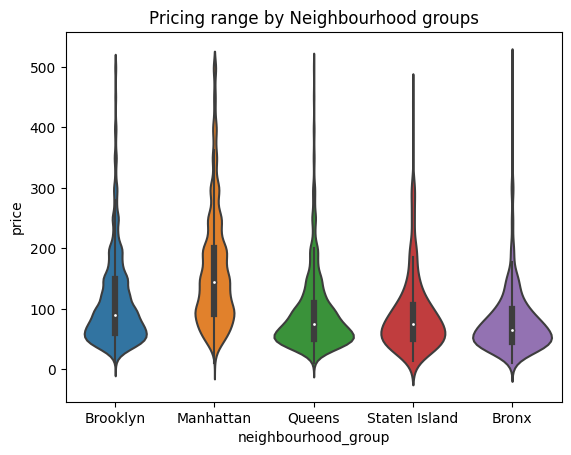

In [68]:
# Chart - 8 visualization code
sns.violinplot(data= df_temp, x='neighbourhood_group', y='price').set_title('Pricing range by Neighbourhood groups')

* Neighbourhood group of "Manhattan" has a median price distribution between 100 to 200, while all others having it below 100 (represented by white dot inside black interquartile range).

* Neighbourhood groups "Brooklyn" and "Manhattan" have more of a vertical cluster density distribution while other three groups having a wider cluster density distribution and shorter interquartile range too.

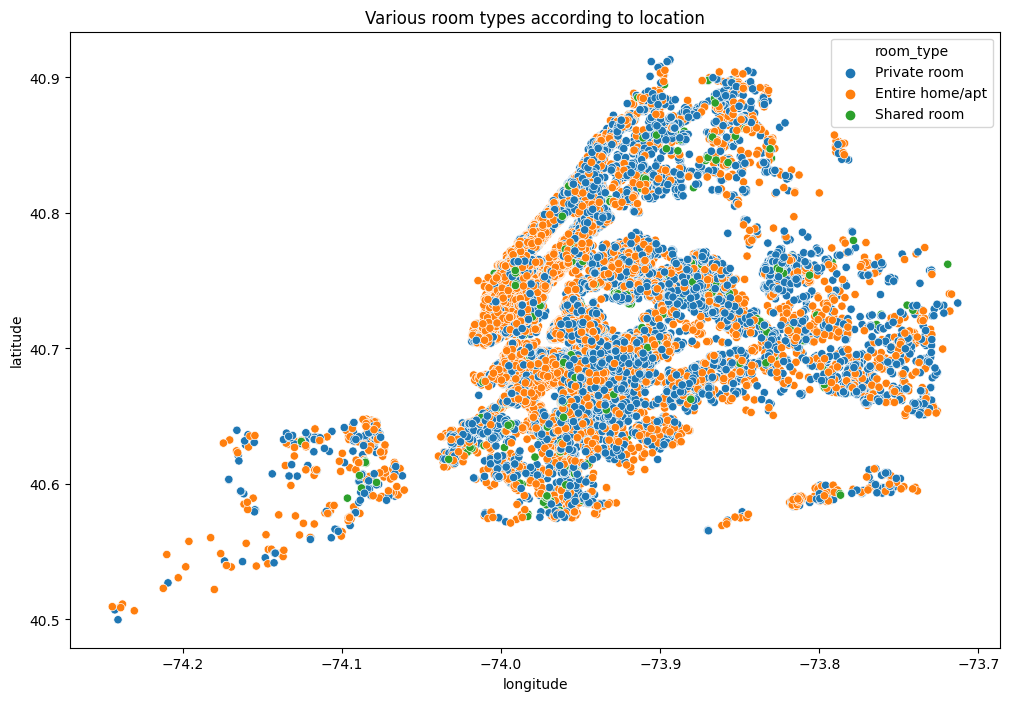

In [69]:
# Chart - 9 visualization code
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='longitude', y='latitude',hue='room_type').set_title('Various room types according to location')
plt.ioff()

* We will be again using Scatterplot but this time to show the various room types across various locations of neighbourhood groups with help of 'latitude' and 'longitude'.

* We can clearly see the abundance of room type "Shared room" is way less than the other two counterparts.

In [70]:
#chart 10
# finding top 10 hosts listing with highest number of reviews
rev_df = df.groupby(['id', 'name', 'neighbourhood'])['number_of_reviews'].max().reset_index()
rev_df = rev_df.sort_values(by= 'number_of_reviews', ascending = False)[0:11]
rev_df

,id,name,neighbourhood,number_of_reviews
11759,9145202,Room near JFK Queen Bed,Jamaica,629
2031,903972,Great Bedroom in Manhattan,Harlem,607
2030,903947,Beautiful Bedroom in Manhattan,Harlem,597
2015,891117,Private Bedroom in Manhattan,Harlem,594
13495,10101135,Room Near JFK Twin Beds,Jamaica,576
10623,8168619,Steps away from Laguardia airport,East Elmhurst,543
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,Lower East Side,540
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,East Elmhurst,510
4870,3474320,Private brownstone studio Brooklyn,Park Slope,488
471,166172,LG Private Room/Family Friendly,Bushwick,480


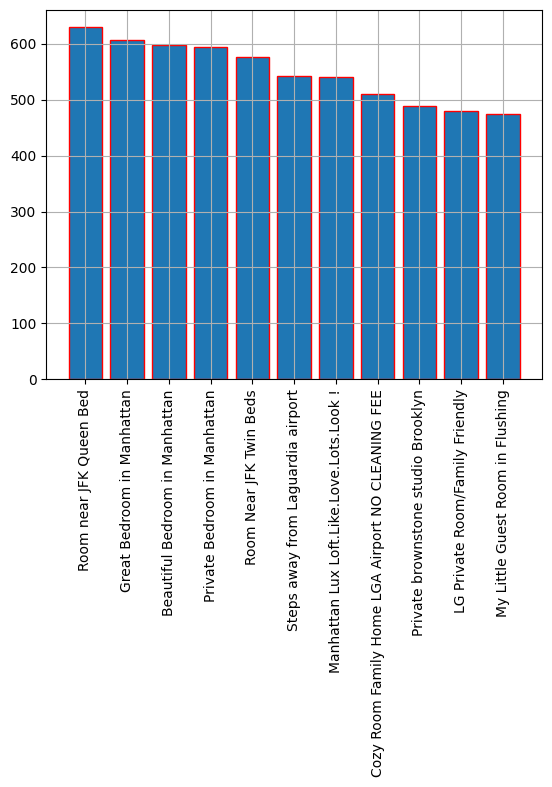

In [71]:
# Chart - 10 Visualization code
fig = plt.figure()
plt.bar(data= rev_df, x= 'name', height= 'number_of_reviews', edgecolor= 'red')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

* We will be using Bar graph as it is simple to represent top 10 listings with highest number of reviews graphically.

* Clearly, "Room near JFK Queen Bed" has recieved highest number of reviews above count of 600.

In [72]:
#correlation heatmap
# creating a seperate dataframe consisting numerical data values only
new_df1 = df.filter(['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'], axis=1)
new_df1

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,149,1,9,6,365
1,225,1,45,2,355
2,150,3,0,1,365
3,89,1,270,1,194
4,80,10,9,1,0
...,...,...,...,...,...
48890,70,2,0,2,9
48891,40,4,0,2,36
48892,115,10,0,1,27
48893,55,1,0,6,2


In [73]:
# Chart - 11 Correlation Heatmap visualization code
corr = new_df1.corr(method= "kendall")
sns.heatmap(corr, annot= True).set_title('Correlation Heatmap')
new_df1.columns

Index(['price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')